In [2]:
from scanalysis.loader import read_bustools_counts
import os

from bulkanalysis.filtering import gmm_threshold

In [3]:

## Arguments
path_to_processed_data = "/storage/research/dbmr_luisierlab/temp/lfournier/Data/Ovarian_Visium_GTOP/hg38/raw_matrices"
treatment1_name = 'A1_NAB_HUG_14'
treatment2_name = 'D1_NAB_HUG_03'
treatment1_id = 'A1_NAB_HUG_14'
treatment2_id = 'D1_NAB_HUG_03'
path_to_results = "/storage/research/dbmr_luisierlab/temp/lfournier/Data/Ovarian_Visium_GTOP/hg38/raw_matrices"

In [4]:
A1_genes = read_bustools_counts(path=os.path.join(path_to_processed_data, treatment1_id), prefix='genes')
D1_genes = read_bustools_counts(path=os.path.join(path_to_processed_data, treatment2_id), prefix='genes')


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# fig, ax = plt.subplots(1,2, figsize=(10,5))
# sns.kdeplot(A1_genes.obs['n_counts'], ax=ax[0]).set_title(treatment1_name, weight='bold')
# sns.kdeplot(D1_genes.obs['n_counts'], ax=ax[1]).set_title(treatment2_name, weight='bold')
# plt.suptitle('Distribution of counts per spot --  Whole hg38 transcriptome', weight='bold', size=16)
# sns.despine()
# ax[0].set_xlabel('Counts per spot')
# ax[1].set_xlabel('Counts per spot')
# plt.tight_layout()

# hg38 full transcriptome

In [6]:

import numpy as np
import pandas as pd

D1_pseudobulk_full = np.array(D1_genes.X.sum(axis=0)).flatten()
A1_pseudobulk_full = np.array(A1_genes.X.sum(axis=0)).flatten()

print(f"D1 pseudobulk shape: {D1_pseudobulk_full.shape}")
print(f"A1 pseudobulk shape: {A1_pseudobulk_full.shape}")

D1 pseudobulk shape: (62700,)
A1 pseudobulk shape: (62700,)


In [7]:

pseudobulk_full = pd.DataFrame([A1_pseudobulk_full, D1_pseudobulk_full], columns=A1_genes.var_names).T
pseudobulk_full.columns = ["A1", "D1"]

In [8]:
pseudobulk_full_log = np.log2(pseudobulk_full+1)

Threshold based on the 90.0th quantile: 1.494
Intersection x point: 1.7243561644453902


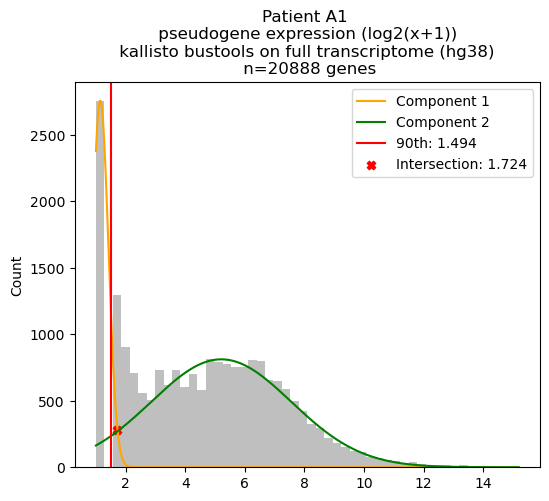

Threshold based on the 90.0th quantile: 2.327
Intersection x point: 2.8817906136269325


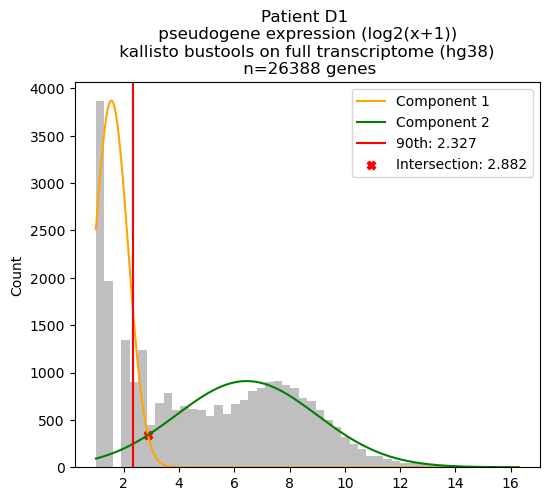

In [9]:
for patient in pseudobulk_full_log.columns:
    ps = pseudobulk_full_log[patient]
    ps = ps[ps > 0]
    ps = ps.values
    gmm_threshold(ps, title=f"Patient {patient} \n pseudogene expression (log2(x+1)) \n kallisto bustools on full transcriptome (hg38) \n n={len(ps)} genes" )


# hg38 -- 3UTRs
## Kallisto vs STAR+featureCounts

In [10]:

## Arguments
path_to_processed_data = "/storage/research/dbmr_luisierlab/temp/lfournier/Data/Ovarian_Visium_GTOP/hg38_myUTRs/raw_matrices"
treatment1_name = 'A1_NAB_HUG_14'
treatment2_name = 'D1_NAB_HUG_03'
treatment1_id = 'A1_NAB_HUG_14'
treatment2_id = 'D1_NAB_HUG_03'
path_to_results = "/storage/research/dbmr_luisierlab/temp/lfournier/Data/Ovarian_Visium_GTOP/hg38_myUTRs/raw_matrices"

In [11]:
A1_UTRs = read_bustools_counts(path=os.path.join(path_to_processed_data, treatment1_id), prefix='transcripts')
D1_UTRs = read_bustools_counts(path=os.path.join(path_to_processed_data, treatment2_id), prefix='transcripts')


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import scanpy as sc

# sc.pp.filter_cells(A1_UTRs, min_counts=0)
# sc.pp.filter_cells(D1_UTRs, min_counts=0)

# fig, ax = plt.subplots(1,2, figsize=(10,5))
# sns.kdeplot(A1_UTRs.obs['n_counts'], ax=ax[0]).set_title(treatment1_name, weight='bold')
# sns.kdeplot(D1_UTRs.obs['n_counts'], ax=ax[1]).set_title(treatment2_name, weight='bold')
# plt.suptitle("Distribution of counts per spot --  3' UTR annotation", weight='bold', size=16)
# sns.despine()
# ax[0].set_xlabel('Counts per spot')
# ax[1].set_xlabel('Counts per spot')
# plt.tight_layout()

In [13]:
import scanpy as sc
import pandas as pd

In [14]:
# Compute pseudobulk_kallisto: sum across all cells for each gene

import numpy as np

D1_pseudobulk_kallisto = np.array(D1_UTRs.X.sum(axis=0)).flatten()
A1_pseudobulk_kallisto = np.array(A1_UTRs.X.sum(axis=0)).flatten()

print(f"D1 pseudobulk_kallisto shape: {D1_pseudobulk_kallisto.shape}")
print(f"A1 pseudobulk_kallisto shape: {A1_pseudobulk_kallisto.shape}")

D1 pseudobulk_kallisto shape: (44038,)
A1 pseudobulk_kallisto shape: (44038,)


In [15]:
df_pseudobulk_kallisto = pd.DataFrame([A1_pseudobulk_kallisto, D1_pseudobulk_kallisto], columns=A1_UTRs.var_names).T
df_pseudobulk_kallisto.columns = ["A1", "D1"]

In [16]:
df_pseudobulk_kallisto["gene"] = [idx.split('.')[0] for idx in df_pseudobulk_kallisto.index]


In [17]:

df_pseudogenes_kallisto = df_pseudobulk_kallisto.groupby("gene").sum()

In [18]:
df_pseudogenes_kallisto_log = np.log2(df_pseudogenes_kallisto +1)

In [19]:
df_pseudogenes_kallisto_log.loc["CD4"]

A1    4.954196
D1    5.832890
Name: CD4, dtype: float32

Threshold based on the 90.0th quantile: 2.641
Intersection x point: 2.6500048556246676


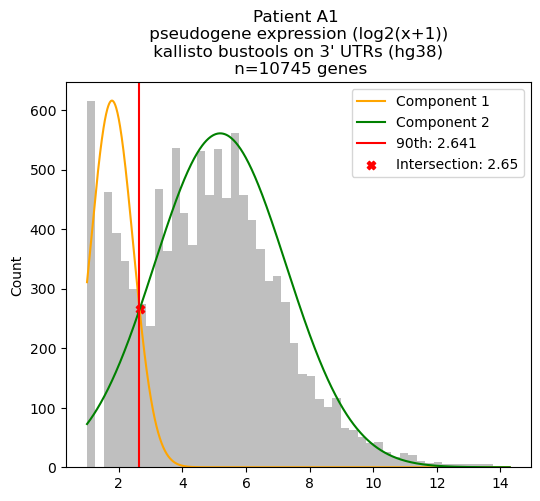

Threshold based on the 90.0th quantile: 2.281
Intersection x point: 2.461339459882246


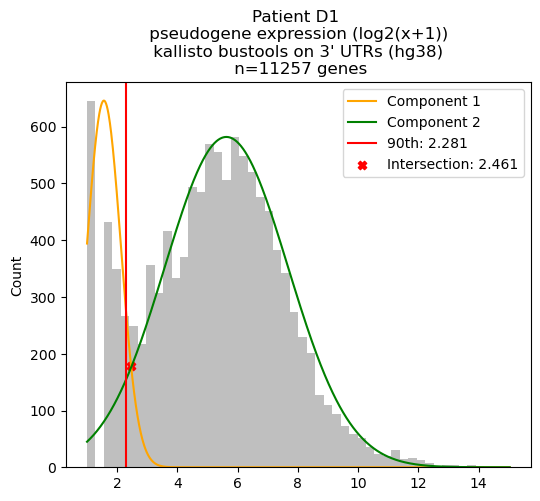

In [20]:
for patient in df_pseudogenes_kallisto_log.columns:
    ps = df_pseudogenes_kallisto_log[patient]
    ps = ps[ps > 0]
    ps = ps.values
    gmm_threshold(ps, title=f"Patient {patient} \n pseudogene expression (log2(x+1)) \n kallisto bustools on 3' UTRs (hg38) \n n={len(ps)} genes" )



In [21]:
## Load featureCounts results

In [22]:
import pandas as pd

file_path = "/storage/research/dbmr_luisierlab/temp/lfournier/Data/Ovarian_Visium_GTOP/hg38/featureCounts/counts_matrix.tsv"

# read the featureCounts matrix (first column as index, no rows skipped)
df_counts = pd.read_csv(file_path, sep='\t', index_col=0, low_memory=False, header=None)
df_counts.columns = ["A1", "D1"]

print("df_counts shape:", df_counts.shape)
print("columns (first 10):", df_counts.columns[:10].tolist())
display(df_counts.head())

df_counts shape: (44038, 2)
columns (first 10): ['A1', 'D1']


,A1,D1
0,,
SAMD11.ENST00000455979.1.Ensembl,2134,14
SAMD11.ENST00000341065.2.PolyASite,2266,1827
KLHL17.ENST00000338591.1.PolyASite,5440,1601
PLEKHN1.ENST00000379407.1.Ensembl,0,25
PLEKHN1.ENST00000379410.1.PolyASite,1363,54


In [23]:
df_counts["gene"] = [idx.split(".")[0] for idx in df_counts.index]

In [24]:
pseudogenes_STAR = df_counts.groupby("gene").sum()

In [25]:
pseudogenes_STAR_log = np.log2(pseudogenes_STAR+1)

Threshold based on the 90.0th quantile: 6.942
Intersection x point: 6.660229937929457


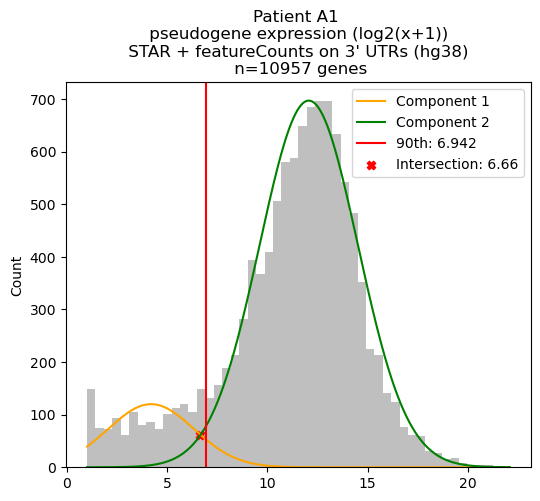

Threshold based on the 90.0th quantile: 7.718
Intersection x point: 7.200458939603559


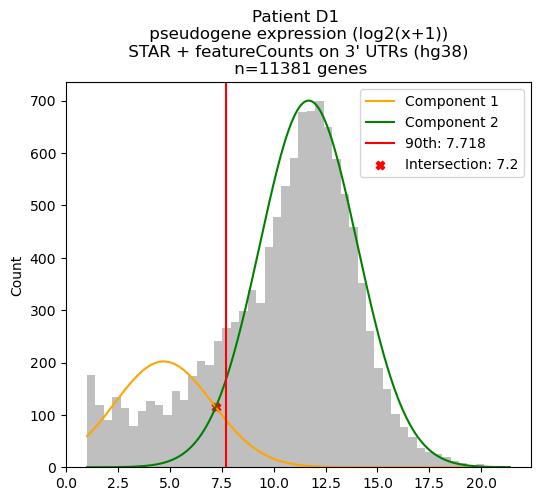

In [26]:
for patient in pseudogenes_STAR_log.columns:
    ps = pseudogenes_STAR_log[patient]
    ps = ps[ps > 0]
    ps = ps.values
    gmm_threshold(ps, title=f"Patient {patient} \n pseudogene expression (log2(x+1)) \n STAR + featureCounts on 3' UTRs (hg38) \n n={len(ps)} genes" )




# Spaceranger

In [27]:

spaceranger_pseudobulk = pd.read_csv("pseudobulk_spaceranger_016um_protein_coding.tsv", sep="\t", index_col=0)
spaceranger_pseudobulk_pseudobulk_log = np.log2(spaceranger_pseudobulk + 1)

## Further analysis
### Difference in scale

In [ ]:
## Example
isoforms = ["BRCA1.ENST00000497488.1.PolyASite", "BRCA1.ENST00000497488.3.PolyASite"]
samples = ["A1", "D1"]

for iso in isoforms:
    print(f"############# Isoform {iso} #############")
    for sample in samples:
        print(f"Number of reads in sample {sample} for method kallisto: {df_pseudobulk_kallisto.loc[iso, sample]}")
        print(f"Number of reads in sample {sample} for method STAR+featureCounts: {df_counts.loc[iso, sample]}")

############# Isoform BRCA1.ENST00000497488.1.PolyASite #############
Number of reads in sample A1 for method kallisto: 3.0
Number of reads in sample A1 for method STAR+featureCounts: 498
Number of reads in sample D1 for method kallisto: 11.0
Number of reads in sample D1 for method STAR+featureCounts: 974
############# Isoform BRCA1.ENST00000497488.3.PolyASite #############
Number of reads in sample A1 for method kallisto: 3.0
Number of reads in sample A1 for method STAR+featureCounts: 758
Number of reads in sample D1 for method kallisto: 4.0
Number of reads in sample D1 for method STAR+featureCounts: 458


In [159]:
df_counts.loc["BRCA1.ENST00000497488.3.PolyASite"]

A1        758
D1        458
gene    BRCA1
Name: BRCA1.ENST00000497488.3.PolyASite, dtype: object

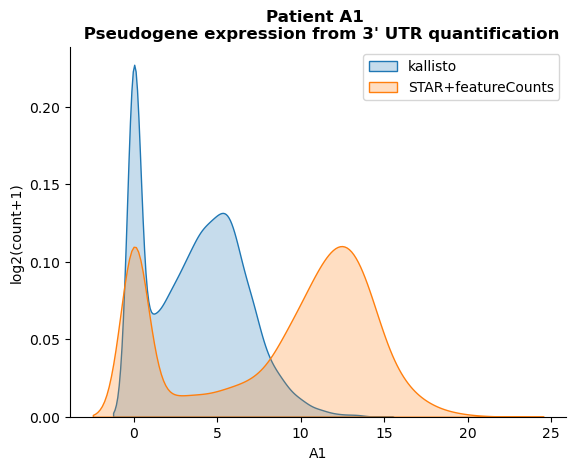

In [172]:
sns.kdeplot(df_pseudogenes_kallisto_log["A1"], fill=True, label="kallisto")
sns.kdeplot(pseudogenes_STAR_log["A1"], fill=True, label="STAR+featureCounts")
sns.despine()
plt.title("Patient A1 \n Pseudogene expression from 3' UTR quantification", weight='bold')
plt.ylabel("log2(count+1)")
plt.legend()